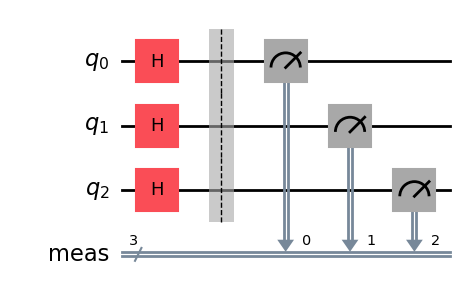

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

#Create a new quantum circuit with three qubits, allowing up to eight different random numbers to be generated
qc = QuantumCircuit(3)

#Place a Hadamard gate at each qubit to transform all qubits into a superposition of the 0 and 1 states
qc.h(0)
qc.h(1)
qc.h(2)

#Measure all of the qubits individually to obtain 0 or 1
qc.measure_all()

#Depict the circuit
qc.draw("mpl")

In [3]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city


# Use the Aer simulator
simulator = AerSimulator()

#Convert quantum circuit into idealised circuit for ISA
qc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc).result()
counts = result.get_counts(qc)
print(list(counts.keys())[0])

011


In [4]:
#Initialise dice result
diceRoll = 0

#Set up while look to ignore 0 and 7
while diceRoll == 0 or diceRoll == 7:
    result = simulator.run(qc).result()
    counts = result.get_counts(qc)
    binaryDiceRoll = list(counts.keys())[0]
    i=0
    for num in binaryDiceRoll:
        diceRoll += 2**(2-i)*int(num)
        i += 1

print("Quantum Dice Outcome:", diceRoll)


Quantum Dice Outcome: 2
